# 02 iRF for causal forest

In [6]:
import irf
from sklearn.datasets import load_boston, load_breast_cancer
from irf.ensemble import (RandomForestClassifierWithWeights,
                          RandomForestRegressorWithWeights)
import numpy as np
from irf import irf_jupyter_utils

In [7]:
X = np.random.normal(0,0.1,1000).reshape(100,10)
Z = np.zeros(100)
Z[:50] = 1
y = np.zeros(100)
y = np.random.uniform(0, 1, (100,))
full_y = np.concatenate([Z.reshape(100,1), y.reshape(100,1)], axis = 1)

In [15]:
rf = RandomForestRegressorWithWeights(criterion='causal', max_depth=4, bootstrap=True)
rf.fit(X, full_y, feature_weight=np.ones((10,)))
rf.predict(X[:10])

array([[0.        , 0.51784819],
       [0.        , 0.51784819],
       [0.        , 0.52471532],
       [0.        , 0.52250803],
       [0.        , 0.51784819],
       [0.        , 0.49113672],
       [0.        , 0.51577218],
       [0.        , 0.51784819],
       [0.        , 0.51749387],
       [0.        , 0.52059542]])

In [12]:
rf.estimators_[0].tree_.feature

array([ 0, -2, -2])

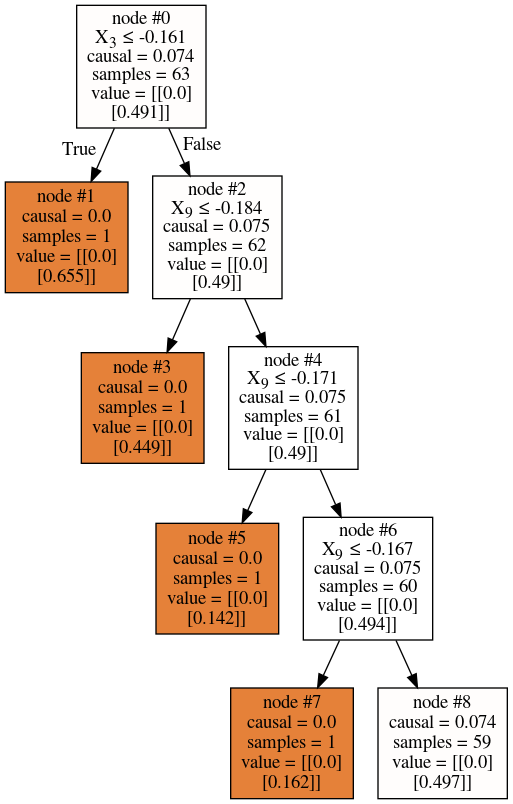

In [14]:
irf_jupyter_utils.draw_tree(decision_tree = rf.estimators_[1])